In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:\Users\acker\Datasets\telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [103]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)
pred_y = knn.predict(X)
pred_y
df.insert(loc=0, column='PredictedChurn', value=pred_y)
df.head()

,PredictedChurn,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,1,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [104]:
hits = 0
for x in range(len(df['PredictedChurn'])):
    if df['PredictedChurn'][x] == df['Churn'][x]:
        hits += 1

total = len(df['PredictedChurn'])
hit_rate = (hits/total)*100
print(f'Hits number: {hits}')
print(f'Total: {total}')
print(f'Hit rate: {hit_rate:.2f} %')

Hits number: 2943
Total: 3333
Hit rate: 88.30 %


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'Accuracy: {score}')

Accuracy: 0.879


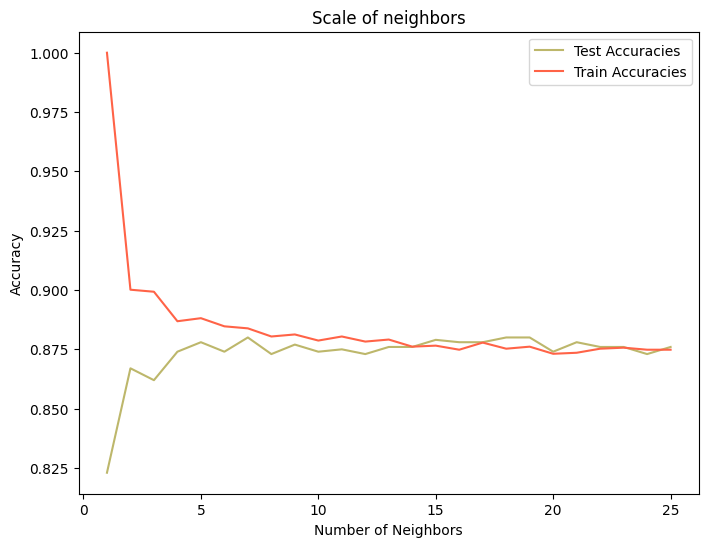

In [106]:
test_accuracies = {}
train_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    train_accuracies[neighbor] = knn.score(X_train, y_train)

plt.figure(figsize=(8, 6))
plt.title('Scale of neighbors')
plt.plot(neighbors, test_accuracies.values(), label='Test Accuracies', color='darkkhaki')
plt.plot(neighbors, train_accuracies.values(), label='Train Accuracies', color='tomato')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()